### 构造预测模型

In [3]:
from sklearn.svm import SVC
# linear即代表着不适用核函数
svm = SVC(C=1.0, kernel='linear', random_state=0)

### 加载数据,训练模型
sklearn中自置了一些实例数据，可以直接使用，比如我们之前使用的鸢尾花。

In [11]:
from sklearn import datasets
# features: petal length, petal width, sepal length, sepal width and species
# 这里我们只取前两个特征作为特征训练
datas = datasets.load_iris()
X = datas.data[:,[1,2]]
y = datas.target
svm.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

### 预测

ValueError: Unrecognized marker style '-'

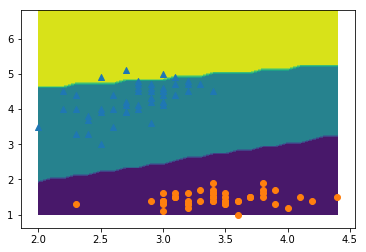

In [18]:
from matplotlib import pyplot as plt
import numpy as np 

x0_min, x0_max = X[:, 0].min(),X[:, 0].max()
x1_min, x1_max = X[:, 1].min(),X[:, 1].max()

interval = 0.1 
xy, yx = np.meshgrid(np.arange(x0_min, x0_max, interval),
                    np.arange(x1_min, x1_max,interval))

z = np.array([xy.ravel(), yx.ravel()]).T

# 预测
z_predict = []
for _z in z:
    z_predict.append(svm.predict(_z.reshape(1,-1)))
    
z_predict = np.array(z_predict).reshape(xy.shape)
# 绘制结果
ax = plt.axes()
ax.contourf(xy, yx, z_predict)
# 绘制原始数据
ax.scatter(X[y == 1,0], X[y == 1,1], marker='^', label='class1')
ax.scatter(X[y == 0,0], X[y == 0,1], marker='o', label='class2')
ax.scatter(X[y == 2,0], X[y == 2,1], marker='-', label='class3')
ax.legend()